In [1]:
# setup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt, date
import scipy.stats as st


In [2]:
#read sample csv
cc_data = pd.read_csv(r"C:\Users\corym\OneDrive\Documents\Data_Analytics_Bootcamp\GIT\Project_1_Group_3\cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544


In [3]:
#isolate Birth Year
cc_data["dob"] = pd.to_datetime(cc_data["dob"])

cc_data['Birth Year'] = cc_data["dob"].dt.year.astype(int)

cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,dob,merch_lat,merch_long,Birth Year
0,264582,2020-09-27 09:41:48,gas_transport,63.12,F,Orient,WA,48.8878,-118.2105,149,1978-06-21,48.633738,-118.039422,1978
1,350571,2020-11-03 11:29:38,gas_transport,68.82,F,Enola,AR,35.2087,-92.2123,969,1954-01-05,36.179802,-92.650560,1954
2,456043,2020-12-09 16:24:42,home,100.85,F,Orangeburg,NY,41.0442,-73.9609,5950,1971-07-02,41.535820,-73.171710,1971
3,537676,2020-12-28 04:18:11,entertainment,7.84,F,Gadsden,AL,34.0480,-85.9246,67082,1963-02-09,33.307946,-86.376173,1963
4,19760,2020-06-28 10:16:40,misc_pos,16.00,M,Minnesota Lake,MN,43.8295,-93.8282,1087,1963-07-14,44.091922,-93.247544,1963


In [4]:
#isolate generation data
silgen_list = []
boomer_list = []
genx_list = []
mill_list = []
genz_list = []
for i in cc_data["Birth Year"]:
    if i >= 1928 and i <= 1945:
        silgen_list.append(i)
    elif i >=1946 and i <= 1964:
        boomer_list.append(i)
    elif i >=1965 and i <= 1980:
        genx_list.append(i)
    elif i >=1981 and i <= 1996:
        mill_list.append(i)
    elif i >=1997 and i <=2010:
        genz_list.append(i)


In [5]:
#convert lists to int format to get counts
silgen_list = pd.Series(silgen_list).astype(int)
silgen_count = silgen_list.count()

boomer_list = pd.Series(boomer_list).astype(int)
boomer_count = boomer_list.count()

genx_list = pd.Series(genx_list).astype(int)
genx_count = genx_list.count()

mill_list = pd.Series(mill_list).astype(int)
mill_count = mill_list.count()

genz_list = pd.Series(genz_list).astype(int)
genz_count = genz_list.count()

In [6]:
#create DF of Generation Counts
generationcountdf = pd.DataFrame({"Silent":[silgen_count], "Baby Boomer": [boomer_count], "X": [genx_count], "Millenial": [mill_count], "Z":[genz_count]})
generationcountdf

,Silent,Baby Boomer,X,Millenial,Z
0,738,1943,3262,3204,759


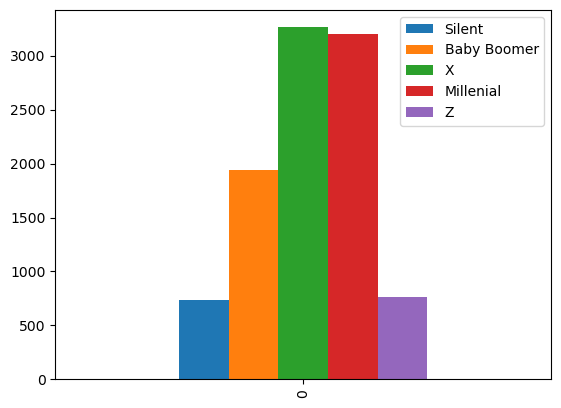

In [7]:
#create bar plot of generation data
generationbar = generationcountdf.plot.bar()

In [8]:
#testing for null data
nulltest = cc_data.isnull().values.any()


In [9]:
#create scatter plot of age and fraud ammounts
cc_data['age'] = 2024 - cc_data['Birth Year']



The correlation between age and transaction amounts is -0.02.


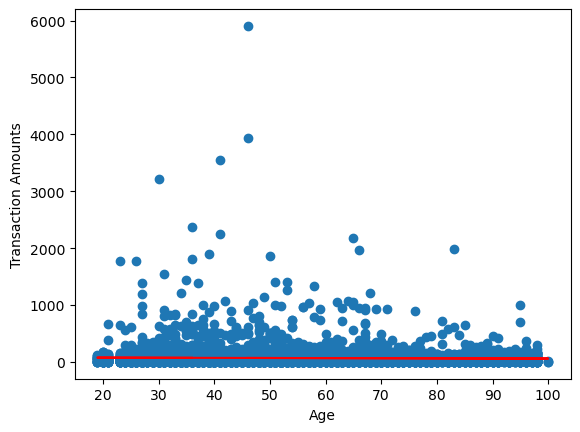

In [10]:
Age = cc_data['age']
Amount = cc_data['amt']
correlation = st.pearsonr(Age, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Age, Amount)
regression = Age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Age, Amount)
plt.plot(Age,regression,"r-")
plt.xlabel("Age")
plt.ylabel("Transaction Amounts")
print(f"The correlation between age and transaction amounts is {round(correlation[0], 2)}.")
plt.show()

The correlation between City Population and transaction amounts is 0.0.


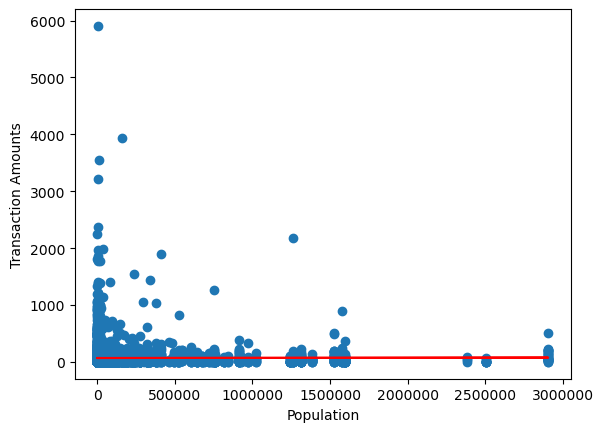

In [13]:
pop = cc_data['city_pop']
Amount = cc_data['amt']
correlation = st.pearsonr(pop, Amount)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(pop, Amount)
regression = pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(pop, Amount)
plt.plot(pop,regression,"r-")
plt.xlabel("Population")
plt.ylabel("Transaction Amounts")
print(f"The correlation between City Population and transaction amounts is {round(correlation[0], 2)}.")
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.show()